# Final Figures for TET DIAL

## Import Functions and Set up Directories

In [1]:
import rushd as rd
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import statannotations 
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
from pathlib import Path
import os
#import statsmodels

import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

#datadir = Path(Path('../../datadir_srk.txt').read_text())

In [36]:
basepath_CTFR = rd.datadir/'instruments'/'data'/'attune'/'Mary'/'2025.03.30_TET-hRAS_reprogramming'
experimentdir_1 = basepath_CTFR/'MEF1'/'5dpi_CTFR'
experimentdir_2 = basepath_CTFR/'MEF2'/'5dpi_CTFR'
experimentdir_3 = basepath_CTFR/'MEF3'/'5dpi_CTFR'
experimentdir_4 = basepath_CTFR/'controls'/'5dpi_CTFR'


basepath_380_CTFR = rd.datadir/'instruments'/'data'/'attune'/'Mary'/'2025.04.27_5dpi_TET-DIAL_3rep_380' # 5 dpi data for 380bp
experimentdir_5 = basepath_380_CTFR/'Plate1'

basepath_14dpi = rd.datadir/'instruments'/'data'/'attune'/'Mary'/'2025.04.27_14dpi_TET-DIAL_hRAS' # 14 dpi data for all spacers
experimentdir_6 = basepath_14dpi/'Controls'
experimentdir_7 = basepath_14dpi/'MEF1-5DOX'
experimentdir_8 = basepath_14dpi/'MEF1-7DOX'
experimentdir_9 = basepath_14dpi/'MEF1-14DOX'
experimentdir_10 = basepath_14dpi/'MEF2-5DOX'
experimentdir_11 = basepath_14dpi/'MEF2-7DOX'
experimentdir_12 = basepath_14dpi/'MEF2-14DOX'
experimentdir_13 = basepath_14dpi/'MEF3-5DOX'
experimentdir_14 = basepath_14dpi/'MEF3-7DOX'
experimentdir_15 = basepath_14dpi/'MEF3-14DOX'

outputdir = rd.rootdir/'flow_analysis_scripts'/'2025_DIAL_paper_upload'/'figs_2024_promoter_editing_paper'/'TETDIALFinalFig6'

In [ ]:
experimentdirs = [
                  experimentdir_1, experimentdir_2, experimentdir_3,experimentdir_4, experimentdir_5, 
                  experimentdir_6, experimentdir_7, experimentdir_8,experimentdir_9, experimentdir_10, 
                  experimentdir_11, experimentdir_12, experimentdir_13,experimentdir_14, experimentdir_15, 
                  ]

for experimentdir in experimentdirs:
    rd.plot.plot_well_metadata(experimentdir/'metadata.yaml')

## Load and Arrange Data

In [ ]:
experimentdirs = [experimentdir_1,
                  experimentdir_2,
                  experimentdir_3,
                  experimentdir_4,
                  experimentdir_5,
                  experimentdir_6,
                  experimentdir_7,
                  experimentdir_8,
                  experimentdir_9,
                  experimentdir_10,
                  experimentdir_11,
                  experimentdir_12,
                  experimentdir_13,
                  experimentdir_14,
                  experimentdir_15
                  ]
# import and store data
cache_files = [outputdir / f"cache{i+1}.gzip" for i in range(len(experimentdirs))]

dfs = {}  # Dictionary to store DataFrames

# Loop through cache files and corresponding directories
for cache_file, experimentdir in zip(cache_files, experimentdirs):
    if cache_file.exists():
        # If the cache file exists, load the data
        dfs[cache_file.name] = pd.read_parquet(cache_file)
    else:
        # Determine which folder exists: 'CSV' or 'export_singlets'
        csv_path = experimentdir / 'CSV'
        singlets_path = experimentdir / 'export_singlets'

        if csv_path.exists():
            data_path = csv_path
        elif singlets_path.exists():
            data_path = singlets_path
        else:
            print(f"⚠️ No valid data folder found in: {experimentdir}")
            continue  # Skip to next experimentdir

        # Debug: List files in the selected directory
        print(f"Using data from: {data_path}")
        print(os.listdir(data_path))

        # Load the data
        dfs[cache_file.name] = rd.flow.load_csv_with_metadata(
            data_path=data_path,
            yaml_path=experimentdir / 'metadata.yaml'
        )
#         dfs[cache_file.name].to_parquet(rd.outfile(cache_file))



Using data from: C:\Users\ChemeGrad2020\OneDrive - Massachusetts Institute of Technology\Documents - GallowayLab\instruments\data\attune\Mary\2025.03.30_TET-hRAS_reprogramming\MEF1\5dpi_CTFR\CSV
['export_A10_Single Cells.csv', 'export_A11_Single Cells.csv', 'export_A12_Single Cells.csv', 'export_A1_Single Cells.csv', 'export_A2_Single Cells.csv', 'export_A3_Single Cells.csv', 'export_A4_Single Cells.csv', 'export_A5_Single Cells.csv', 'export_A6_Single Cells.csv', 'export_A7_Single Cells.csv', 'export_A8_Single Cells.csv', 'export_A9_Single Cells.csv', 'export_B10_Single Cells.csv', 'export_B11_Single Cells.csv', 'export_B12_Single Cells.csv', 'export_B1_Single Cells.csv', 'export_B2_Single Cells.csv', 'export_B3_Single Cells.csv', 'export_B4_Single Cells.csv', 'export_B5_Single Cells.csv', 'export_B6_Single Cells.csv', 'export_B7_Single Cells.csv', 'export_B8_Single Cells.csv', 'export_B9_Single Cells.csv', 'export_C10_Single Cells.csv', 'export_C11_Single Cells.csv', 'export_C12_Sing

In [8]:
# create variables df1, df2, df3, etc.
for i, (cache_file_name, df) in enumerate(dfs.items(), 1):
    globals()[f'df{i}'] = df

# Get column names from df1 to df15 using globals()
all_columns = set()
for i in range(1, 16):
    df = globals()[f'df{i}']
    all_columns.update(df.columns)

print("Unique column names across all DataFrames:")
print(sorted(all_columns))


Unique column names across all DataFrames:
['CRE', 'CTFR-A', 'CTFR-H', 'CTFR-W', 'DOX', 'DOX-Day', 'Date', 'FSC-A', 'FSC-H', 'FSC-W', 'GFP-A', 'GFP-H', 'GFP-W', 'SSC-A', 'SSC-H', 'SSC-W', 'TagBFP-A', 'TagBFP-H', 'TagBFP-W', 'Time', 'co-inf_TagBFP-A', 'co-inf_TagBFP-H', 'co-inf_TagBFP-W', 'eGFP-A', 'eGFP-H', 'eGFP-W', 'hRAS_mCherry-A', 'hRAS_mCherry-H', 'hRAS_mCherry-W', 'infection', 'mCherry-A', 'mCherry-H', 'mCherry-W', 'modRNA', 'population', 'replicate', 'reporter', 'well']


In [9]:
r1 = 'MEF1'
r2 = 'MEF2'
r3 = 'MEF3'

df1['replicate']= r1
df2['replicate']= r2
df3['replicate']= r3

for df in [df7, df8, df9]:
    df['replicate'] = 'MEF1'
    
for df in [df10, df11, df12]:
    df['replicate'] = 'MEF2'

for df in [df13, df14, df15]:
    df['replicate'] = 'MEF3'

In [10]:
# Merge all DataFrames from df1 to df15 using pd.concat
df_CTFR_all = pd.concat([df1,df2,df3,df4], ignore_index=True)

df_CTFR_380 = df5

df_14dpi = pd.concat([df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], ignore_index=True)

In [11]:
columns_to_keep = [
    'CTFR-A', 'DOX', 'DOX-Day', 'FSC-A',
    'eGFP-A', 'TagBFP-A', 'mCherry-A',
    'reporter', 'modRNA', 'well','replicate'
]

In [12]:
df_CTFR_all.columns.unique()

Index(['infection', 'DOX', 'modRNA', 'well', 'population', 'FSC-A', 'FSC-H',
       'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'eGFP-A', 'eGFP-H', 'eGFP-W',
       'CTFR-A', 'CTFR-H', 'CTFR-W', 'TagBFP-A', 'TagBFP-H', 'TagBFP-W',
       'mCherry-A', 'mCherry-H', 'mCherry-W', 'Time', 'replicate', 'reporter'],
      dtype='object')

In [13]:
df_CTFR_all['reporter'] = df_CTFR_all.get('reporter').fillna(df_CTFR_all.get('infection'))

In [14]:
df_CTFR_380.columns.unique()

Index(['reporter', 'DOX', 'CRE', 'replicate', 'well', 'population', 'FSC-A',
       'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'eGFP-A', 'eGFP-H',
       'eGFP-W', 'CTFR-A', 'CTFR-H', 'CTFR-W', 'TagBFP-A', 'TagBFP-H',
       'TagBFP-W', 'mCherry-A', 'mCherry-H', 'mCherry-W', 'Time'],
      dtype='object')

In [15]:
df_CTFR_380.rename(columns={'CRE': 'modRNA'}, inplace=True)

In [16]:
df_14dpi.columns.unique()

Index(['reporter', 'DOX', 'DOX-Day', 'CRE', 'Date', 'well', 'population',
       'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'GFP-A', 'GFP-H',
       'GFP-W', 'co-inf_TagBFP-A', 'co-inf_TagBFP-H', 'co-inf_TagBFP-W',
       'hRAS_mCherry-A', 'hRAS_mCherry-H', 'hRAS_mCherry-W', 'Time',
       'replicate'],
      dtype='object')

In [17]:
df_14dpi.rename(columns={'CRE': 'modRNA'}, inplace=True)
df_14dpi.rename(columns={'co-inf_TagBFP-A': 'TagBFP-A'}, inplace=True)
df_14dpi.rename(columns={'hRAS_mCherry-A': 'mCherry-A'}, inplace=True)
df_14dpi.rename(columns={'GFP-A': 'eGFP-A'}, inplace=True)

In [18]:
for name in ['df_CTFR_all', 'df_CTFR_380', 'df_14dpi']:
    df = globals()[name]
    filtered = df.loc[:, [col for col in columns_to_keep if col in df.columns]]
    globals()[name] = filtered

Get rid of negative values

In [19]:
columns_to_gate = [
    'CTFR-A', 'FSC-A',
    'eGFP-A', 'TagBFP-A', 'mCherry-A'
]

In [20]:
for name in ['df_CTFR_all', 'df_CTFR_380', 'df_14dpi']:
    df = globals()[name]

    # For each column in columns_to_keep that exists in df,
    # keep only rows where the value is > 0
    for col in columns_to_gate:
        if col in df.columns:
            df = df[df[col] > 0]

    # Update the variable with the filtered df
    globals()[name] = df

## CTFR gate

In [21]:
df_CTFR_all.reporter.unique()

array(['203bp-hR', '380bp-hR', '610bp-hR', 'loxPcon-hR', 'Puro', 'retro',
       'None', 'loxPrept'], dtype=object)

In [22]:
df_CTFR_380.reporter.unique()

array(['None', 'Puro', '380 bp', 'loxPrept'], dtype=object)

In [23]:
df_14dpi.reporter.unique()

array(['LNI.SDD.hRAS', 'None', 'loxPrept', '203 bp', '380 bp', '610 bp',
       'loxP control'], dtype=object)

### CTFR_all from 2025.03.30

In [24]:
df_CTFR_all[df_CTFR_all['reporter'] == 'Puro']

,CTFR-A,DOX,FSC-A,eGFP-A,TagBFP-A,mCherry-A,reporter,modRNA,well,replicate
16919432,33787.0,NO DOX,448142.0,226,539.0,192,Puro,<NA>,B1,MEF1
16919434,2159.0,NO DOX,496451.0,80,101.0,26,Puro,<NA>,B1,MEF1
16919437,12037.0,NO DOX,467655.0,166,158.0,27,Puro,<NA>,B1,MEF1
16919438,6940.0,NO DOX,367439.0,74,77.0,39,Puro,<NA>,B1,MEF1
16919440,17320.0,NO DOX,730845.0,88,361.0,106,Puro,<NA>,B1,MEF1
...,...,...,...,...,...,...,...,...,...,...
17099484,10640.0,NO DOX,329738.0,59,83.0,51,Puro,<NA>,C9,MEF3
17099485,68544.0,NO DOX,276569.0,335,2780.0,412,Puro,<NA>,C9,MEF3
17099486,42972.0,NO DOX,306967.0,103,1947.0,300,Puro,<NA>,C9,MEF3
17099487,37702.0,NO DOX,617096.0,38,667.0,69,Puro,<NA>,C9,MEF3


In [25]:
# Initialize an empty dictionary to store the results for each repetition
CTFR_all_gate_dict = {}

# Loop through each repetition
reps = [r1, r2, r3]
for rep in reps:
    # Create CTFR_gate_Cre for each rep
    CTFR_all_gate_dict[rep] = df_CTFR_all[(df_CTFR_all['reporter'] == 'Puro') &
                        (df_CTFR_all['replicate'] == rep)]['CTFR-A'].quantile(0.2)
# Optionally, you can print the results

for rep, gate in CTFR_all_gate_dict.items():
    print(f"{rep} CTFR_gate: {gate}")

MEF1 CTFR_gate: 3719.0
MEF2 CTFR_gate: 5447.6
MEF3 CTFR_gate: 7304.400000000001


### CTFR_380 from 2025.04.27

In [26]:
df_CTFR_380[df_CTFR_380['reporter']== 'Puro']

,CTFR-A,DOX,FSC-A,eGFP-A,TagBFP-A,mCherry-A,reporter,modRNA,well,replicate
103102,12156.0,NO DOX,272522.0,56,1639.0,191,Puro,None,B10,MEF3
103103,4327.0,NO DOX,226799.0,82,183.0,22,Puro,None,B10,MEF3
103104,9014.0,NO DOX,506966.0,20,648.0,247,Puro,None,B10,MEF3
103105,11995.0,NO DOX,351065.0,165,953.0,217,Puro,None,B10,MEF3
103106,4767.0,NO DOX,213693.0,65,570.0,13,Puro,None,B10,MEF3
...,...,...,...,...,...,...,...,...,...,...
157923,85112.0,NO DOX,293535.0,223,1092.0,256,Puro,None,B9,MEF3
157926,8370.0,NO DOX,370006.0,11,316.0,68,Puro,None,B9,MEF3
157928,12695.0,NO DOX,423220.0,8,246.0,151,Puro,None,B9,MEF3
157929,22925.0,NO DOX,430008.0,114,434.0,94,Puro,None,B9,MEF3


In [27]:
# Initialize an empty dictionary to store the results for each repetition
CTFR_380_gate_dict = {}

# Loop through each repetition
reps = [r1, r2, r3]
for rep in reps:
    # Create CTFR_gate_Cre for each rep
    CTFR_380_gate_dict[rep] = df_CTFR_380[(df_CTFR_380['reporter'] == 'Puro') &
                        (df_CTFR_380['replicate'] == rep)]['CTFR-A'].quantile(0.2)
# Optionally, you can print the results

for rep, gate in CTFR_380_gate_dict.items():
    print(f"{rep} CTFR_gate: {gate}")

MEF1 CTFR_gate: 7074.6
MEF2 CTFR_gate: 6347.6
MEF3 CTFR_gate: 6529.0


## Plotting Functions

In [28]:
sns.set_theme(style="ticks",font='Arial',font_scale=1)
plt.rcParams['font.family'] = 'Arial'

def custom_barplot(x,y,data,filename,height=4,width=8,hue=None,xlabel_rot=90,xlabel='',plottitle='',palette='viridis',order=None,hue_order=None,pairs=None,alpha=0.8,reps=None,subfolder=None):
    aspect = width / height
    g = sns.catplot(x=x,y=y,data=data,height=height,aspect=aspect,palette=palette,kind='bar',hue=hue,order=order,hue_order=hue_order,alpha=alpha,errorbar='ci',legend=None)
    ax = plt.gca()
    
    if order != None:
        labels = [ '\n('.join(l.split('(')) for l in order]
        labels = [ '\n'.join(l.split(' ')) for l in labels]
    else:
        labels = None

    if hue == None:
        dodge = False
    elif hue != None:
        dodge = True

    if reps is None:
        g.map_dataframe(sns.stripplot, x=x,y=y, 
                    hue=hue, palette=["#404040"], 
                    alpha=0.8, dodge=dodge,order=order,hue_order=hue_order)
    
    marker_list = ['o', '^', 's', 'D', 'P', 'X']

    if reps is not None:
        for (j, rep) in enumerate(data[reps].unique()):
            sns.stripplot(
                ax=ax, data=data[data[reps] == rep],
                x=x, y=y,
                order=order,
                hue=hue,
                hue_order=hue_order,
                dodge=dodge, marker=marker_list[j],
                palette=['white'], size=5,
                edgecolor='black', linewidth=0.4,
                legend=None)

    if pairs != None:
        annotator = Annotator(ax,pairs,data=data,x=x,y=y,order=order,hue=hue,hue_order=hue_order)
        annotator.configure(test='t-test_ind',text_format='star',loc='inside', verbose=2)
        annotator.apply_and_annotate()
        #add_stat_annotation(ax, data=data, x=xcat, y=ycat, order=order,
        #            box_pairs=pairs,
        #            test='t-test_ind', text_format='star', verbose=2)

    ymin, ymax = ax.get_ylim()
    if ymax > 1000:
        k_formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f'{x:.0f}' if abs(x) < 1000 else f'{x/1000:.0f}k')
        ax.yaxis.set_major_formatter(k_formatter)

    #sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False) # make plot bounded on all sides
    
    g.set_xticklabels(labels,rotation=xlabel_rot, horizontalalignment='center' if xlabel_rot==0 else 'right')
    plt.xlabel(xlabel)
    plt.ylabel(y)
    plt.title(plottitle)

    if hue is not None:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, frameon=False)  # Adjust bbox_to_anchor as needed

    plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.25) # make all plots have the same area
    #g.tight_layout()
    if subfolder == False:
        g.savefig(outputdir/str(filename + '.svg'),dpi=300)
    else:
        g.savefig(outputdir/subfolder/str(filename + '.svg'),dpi=300)


def custom_catplot(xcat,ycat,data,savetitle,hue=None,hue_order=None,height=3,width=6,
                   xlabel_rot=0,xlabel='',plottitle='',order=None,palette=None,pairs=None,color=None,log=False,sci=False,reps=None,errorbar=True):

    if hue == None:
        dodge = False
    elif hue != None:
        dodge = 0.4

    if errorbar == True:
        plt.figure(figsize=(width,height))
        g = sns.pointplot(x=xcat,y=ycat,data=data,errorbar='se',join=False,capsize=0.05, hue_order=hue_order,
                        palette=palette,markers='_',scale=.7,errwidth=1.5,order=order,hue=hue,color=color,dodge=0.7)
        ax = plt.gca()

        marker_list = ['o', '^', 's', 'D', 'P', 'X']
        if reps is not None:
            for (j, rep) in enumerate(data[reps].unique()):
                sns.stripplot(
                    ax=ax, data=data[data[reps] == rep],
                    x=xcat, y=ycat,
                    order=order,
                    hue=hue,
                    hue_order=hue_order,
                    dodge=dodge, marker=marker_list[j],
                    #color='white',
                    palette=palette,
                    size=5,
                    edgecolor='white', linewidth=0.4,
                    legend=None)
                
        #g.set_xticklabels(labels,rotation=xlabel_rot, horizontalalignment='center' if xlabel_rot==0 else 'right')

    if errorbar == False:
        g = plt.figure(figsize=(width,height))
        ax = plt.gca()
        marker_list = ['o', '^', 's', 'D', 'P', 'X']
        if reps is not None:
            for (j, rep) in enumerate(data[reps].unique()):
                sns.stripplot(
                    #ax=ax,
                    data=data[data[reps] == rep],
                    x=xcat, y=ycat,
                    order=order,
                    hue=hue,
                    hue_order=hue_order,
                    dodge=dodge, marker=marker_list[j],
                    #color='white',
                    palette=palette,
                    size=10,
                    edgecolor='white', linewidth=0.4,
                    )
    

    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[0:len(hue_order)], labels[0:len(hue_order)], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)
    
    if order != None:
        #labels = [ '\n'.join(wrap(l, 7)) for l in order]
        #labels = [ '\n'.join(l.split(' ')) for l in order]
        labels = [ '\n('.join(l.split('(')) for l in order]
    else:
        labels = None
    ax.set_xticklabels(labels,rotation=xlabel_rot, horizontalalignment='center' if xlabel_rot==0 else 'right')

    ymin, ymax = ax.get_ylim()
    if log == True:
        ax.set_yscale('log')
    elif ymax > 1000:
        if sci == True:
            plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
        elif sci == False:
            k_formatter = matplotlib.ticker.FuncFormatter(lambda x, _: f'{x:.0f}' if abs(x) < 1000 else f'{x/1000:.0f}k')
            ax.yaxis.set_major_formatter(k_formatter)
    
    if pairs != None:
        annotator = Annotator(ax,pairs,data=data,x=xcat,y=ycat,order=order,hue=hue,hue_order=hue_order)
        annotator.configure(test='t-test_ind',text_format='star',loc='inside')
        annotator.apply_and_annotate()

    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    
    if hue == None:
        plt.margins(x=0.3, y=0.3) # for some reason the plot is being weird and this makes it look better

    #plt.legend([],[], frameon=False)
    plt.xlabel(xlabel)
    plt.ylabel(ycat)
    plt.title(plottitle)
    plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.25) # make all plots have the same area
    #plt.tight_layout()
    plt.savefig(outputdir/str(savetitle + '.svg'),dpi=600)
    plt.show()

def SK_dotplot( x, y, hue, data,pairs=[], palette = 'muted', order=None, hue_order =None, plottitle="",savetitle = '',
                 save_fig=False, dodge=True,x_rot=0, scientific=True,yscale="linear", stat_text = 'star', 
                 ylim=False,aspect=None, plot_reps=True, join=False, foldchange=False,
                 xlabel = 'Default', ylabel = 'Default', legend=True, xticklabels=True,
                 type = 'pointplot', figsize = None, markers='o', pointplot_settings='old',
                 fontsize=False, axis_lines={'top': False, 'bottom': True, 'left': True, 'right': False},capsize=True,subfolder=False):


        if aspect != None:
            g, ax = plt.subplots()
            ax.set_box_aspect(aspect)
            #plt.rc('ytick', labelsize=15) 
        if figsize != None:
            plt.figure(figsize=figsize)

        #plot all of the replicates of each condtion
        if plot_reps == True:
            g = sns.stripplot(data=data, x=x, y=y,hue=hue, dodge = dodge, alpha=0.2, palette=palette,size=4,hue_order=hue_order, order=order)

        #Add in the means 
        #sns.barplot(x="reporter", y="eGFP-A_gmean",hue='rec', data=s, estimator=np.mean,capsize=.1,alpha=0.2,errwidth=2,errcolor='gray')
        if dodge == True and hue is not None:
            n_hue_levels = len(data[hue].unique())
            if n_hue_levels > 1:
                dodge_amt = 0.5
            else:
                dodge_amt = False
        elif dodge == True and hue is None:
            dodge_amt = 0.5
        else:
            dodge_amt = False

        if type == 'pointplot':
            if pointplot_settings == 'new':
                g = sns.pointplot(x=x, y=y,hue=hue, data=data, estimator=np.mean, 
                            errorbar='se', capsize=0,errwidth=0.75, join=join,scale=0.75, dodge = dodge_amt , 
                            palette=palette,hue_order=hue_order, order=order, markers=markers)
            #Old pointpolt settings
            if pointplot_settings == 'old':
                g = sns.pointplot(x=x, y=y,hue=hue, data=data, estimator=np.mean, 
                    errorbar='se', capsize=.18,errwidth=.75, join=join, markers=markers,scale=.75, dodge = dodge_amt , 
                    palette=palette,hue_order=hue_order, order=order)
                
            if pointplot_settings == 'fig6':
                g = sns.pointplot(x=x, y=y,hue=hue, data=data, estimator=np.mean, 
                    errorbar='se', capsize=.42,errwidth=.75, join=join, markers=markers,scale=.75, dodge = dodge_amt , 
                    palette=palette,hue_order=hue_order, order=order)
            if pointplot_settings == 'fig6_2':
                g = sns.pointplot(x=x, y=y,hue=hue, data=data, estimator=np.mean, 
                    errorbar='se', capsize=.9,errwidth=.75, join=join, markers=markers,scale=.75, dodge = dodge_amt , 
                    palette=palette,hue_order=hue_order, order=order)
            
            if legend==False:
                g.get_legend().remove()
             

        if type == 'barplot':
            g = sns.barplot(x=x, y=y, hue=hue, data=data, estimator=np.mean,
                            errorbar='se', capsize=.1,errwidth=1, dodge = dodge_amt , 
                    palette=palette, hue_order=hue_order, order=order, alpha = 0.7,markers=markers)
        
        
        if (legend==True and hue != None):
            # g is an Axes
            handles, labels = g.get_legend_handles_labels()
            g.legend(handles=handles, labels=labels, title='Condition', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

    
        
        #rotate the x-labels
        # labels = g.get_xticklabels()
        # if xticklabels == False:
        #     labels = []
        if order != None:
            labels = [ '\n('.join(l.split('(')) for l in order]
            labels = [ '\n'.join(l.split(' ')) for l in labels]
        g.set_xticklabels(labels=labels, rotation=x_rot, horizontalalignment='center' if x_rot==0 else 'right')



        #set the y-scale
        plt.yscale(yscale)

        #Set ylim
        if ylim != False:
            g.set_ylim(ymin=ylim[0], ymax=ylim[1])

        #make scientific axes 
        if scientific != False:
            if yscale == "linear":
                plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

        #Add in the T-tests
        if len(pairs)>0:
            add_stat_annotation(g, data=data, x=x, y=y,hue=hue,
                        box_pairs=pairs, order=order, hue_order=hue_order,
                        test='t-test_ind', text_format=stat_text, loc='inside', verbose=2, 
                        comparisons_correction= None)
            if foldchange and len(pairs) > 0:
                ylim_min, ylim_max = g.get_ylim()
                y_range = ylim_max - ylim_min

                n_hues = len(hue_order)
                dodge_width = 0.4  # tweak this if needed

                def get_dodge_offset(hue_idx):
                    return dodge_width * (hue_idx - (n_hues - 1) / 2)

                for i, pair in enumerate(pairs):
                    # Parse tuple of tuples like: (('5 dpi', '5 dpi'), ('5 dpi + Cre', '5 dpi + Cre'))
                    try:
                        (x1, hue1), (x2, hue2) = pair
                    except ValueError:
                        print(f"Skipping invalid pair format: {pair}")
                        continue

                    # Must be same x group for fold change
                    if x1 != x2:
                        continue

                    # Get data for each group
                    data1 = data.loc[(data[x] == x1) & (data[hue] == hue1), y]
                    data2 = data.loc[(data[x] == x2) & (data[hue] == hue2), y]

                    if data1.empty or data2.empty or data1.isnull().all() or data2.isnull().all():
                        continue

                    mean1 = data1.mean()
                    mean2 = data2.mean()

                    if mean1 == 0 or np.isnan(mean1) or np.isnan(mean2):
                        continue

                    fc = mean2 / mean1

                    # Position the annotation
                    try:
                        hue_pos1 = hue_order.index(hue1)
                        hue_pos2 = hue_order.index(hue2)
                        x_pos = order.index(x1)
                    except ValueError:
                        continue

                    x_offset = (get_dodge_offset(hue_pos1) + get_dodge_offset(hue_pos2)) / 2
                    x_text = x_pos + x_offset
                    y_text = ylim_max + (0.05 + 0.05 * i) * y_range

                    g.text(x_text, y_text, f'{fc:.2f}x', ha='center', va='bottom',
                        fontsize=fontsize if fontsize else 10, color='black')


        #set x-label and y-label 
        xl = xlabel; yl = ylabel; 
        if xlabel == 'Default': 
             xl = x
        if ylabel == 'Default': 
             yl = y
        plt.xlabel(xl)  # Adjust x-axis label
        plt.ylabel(yl)  # Adjust y-axis label

        if fontsize != False: 
            g.set_xlabel(xl, fontsize=fontsize)  # Adjust the font size of x-axis label
            g.set_ylabel(yl, fontsize=fontsize)  # Adjust the font size of y-axis label
            #set ticks 
            g.tick_params(axis='both', labelsize=fontsize,length=5)  # Adjust the font size of tick labels and tick lengths

        plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.25) # make all plots have the same area

        plt.title(plottitle)
        g.spines['top'].set_visible(True)
        g.spines['right'].set_visible(True)
        g.spines['bottom'].set_visible(True)
        g.spines['left'].set_visible(True)

        if not axis_lines['top']:
            g.spines['top'].set_visible(False)
        if not axis_lines['right']:
            g.spines['right'].set_visible(False)
        if not axis_lines['bottom']:
            g.spines['bottom'].set_visible(False)
        if not axis_lines['left']:
            g.spines['left'].set_visible(False)
        
        

        # adjust figure size to accommodate all axes decorations
        # plt.tight_layout()

        if ylim:
            plt.ylim(ylim[0], ylim[1])
        
        plt.show(g)
        #save figure
       
        h = g.get_figure()
        if save_fig==True:
                if subfolder == False:
                    h.savefig(outputdir/str(savetitle + '.svg'),dpi=300)
                else:
                    h.savefig(outputdir/subfolder/str(savetitle + '.svg'),dpi=300)
        return g


## 5 dpi plots

### Compute summary stats

In [29]:
df_CTFR_all['mCherry-A'] = pd.to_numeric(df_CTFR_all['mCherry-A'], errors='coerce')

In [30]:
groups = ['replicate','reporter','DOX','modRNA','well'] # 'rep' must be first group!!!!

def percent_hyperP(x):
    rep = x.name[0]  # Assuming 'rep' is the first group
    #gate_value = CTV_gates[rep]
    gate_value = CTFR_all_gate_dict.get(rep)
    return np.mean(x < gate_value) * 100

def total_hyperP(x):
    rep = x.name[0]  # Assuming 'rep' is the first group
    gate_value = CTFR_all_gate_dict.get(rep)
    return np.sum(x < gate_value)

# Create the summary dataframe
summary_df_CTFR_all = pd.concat([
    df_CTFR_all.groupby(groups)['CTFR-A'].apply(total_hyperP).rename('(#) Total HyperP'),
    df_CTFR_all.groupby(groups)['mCherry-A'].apply(scipy.stats.gmean).rename('Output gmean (mCherry)')
], axis=1)
summary_df_CTFR_all = summary_df_CTFR_all.reset_index()

dot2plot = ['(#) Total HyperP', 'Normalized\n# HyperP cells','Output gmean (mCherry)']

In [31]:
def set_cond(row):
    if row['DOX'] == 'NO DOX' and row['modRNA'] == 'None':
        return 'None'
    elif row['DOX'] == 'DOX' and row['modRNA'] == 'None':
        return 'DOX'
    elif row['DOX'] == 'DOX' and row['modRNA'] == 'eeBxb1':
        return 'DOX+eeBxb1'
    elif row['DOX'] == 'DOX' and row['modRNA'] == 'Puro-Cre':
        return 'DOX+Cre'
    else:
        return None

# Apply the function to create the 'cond' column
summary_df_CTFR_all['cond'] = summary_df_CTFR_all.apply(set_cond, axis=1)

In [32]:
summary_df_CTFR_all['reporter'] = summary_df_CTFR_all['reporter'].replace('380bp-hR', '380 bp')
summary_df_CTFR_all['reporter'] = summary_df_CTFR_all['reporter'].replace('loxPcon-hR', 'loxP control')

In [33]:
# Step 1: Compute average for each replicate+reporter group where cond == 'DOX+eeBxb1'
averages = (
    summary_df_CTFR_all[summary_df_CTFR_all['cond'] == 'DOX+eeBxb1']
    .groupby(['replicate', 'reporter'])['(#) Total HyperP']
    .mean()
)

# Step 2: Map the group average to each row based on its replicate and reporter
summary_df_CTFR_all['DOX+eeBxb1 Avg per Rep_Reporter'] = summary_df_CTFR_all.set_index(['replicate', 'reporter']).index.map(averages)

# Step 3: Normalize using the group average
summary_df_CTFR_all['Normalized\n# HyperP cells'] = (
    summary_df_CTFR_all['(#) Total HyperP'] / summary_df_CTFR_all['DOX+eeBxb1 Avg per Rep_Reporter']
)

In [53]:
#save summary dataframe
summary_df_CTFR_all.to_excel('Fig6_5dpiHyperP_reprogramming_TETDIAL_and_supps.xlsx',index=False)

### per rep

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=1.999e-05 stat=-7.527e+00
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=3.074e-04 stat=-5.386e+00


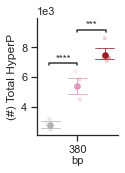

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=1.999e-05 stat=-7.527e+00
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=3.074e-04 stat=-5.386e+00


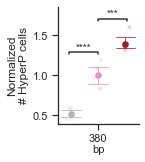

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=2.808e-11 stat=-3.106e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=1.782e-08 stat=-1.609e+01


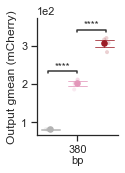

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=2.890e-11 stat=-3.097e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=7.241e-04 stat=4.800e+00


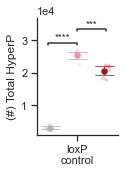

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=2.890e-11 stat=-3.097e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=7.241e-04 stat=4.800e+00


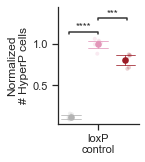

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=1.266e-12 stat=-4.244e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=5.429e-03 stat=-3.532e+00


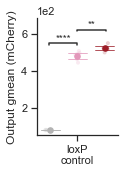

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=3.632e-08 stat=-1.494e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=4.892e-05 stat=-6.774e+00


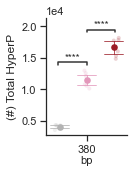

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=3.632e-08 stat=-1.494e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=4.892e-05 stat=-6.774e+00


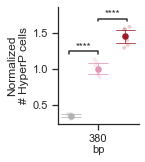

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=5.400e-10 stat=-2.302e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=6.685e-06 stat=-8.530e+00


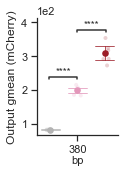

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=5.225e-12 stat=-3.680e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=5.060e-01 stat=6.899e-01


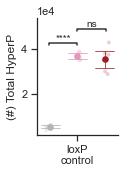

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=5.225e-12 stat=-3.680e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=5.060e-01 stat=6.899e-01


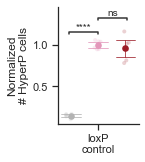

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=3.052e-08 stat=-1.521e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=6.330e-03 stat=-3.440e+00


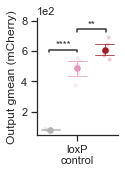

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=1.437e-05 stat=-7.820e+00
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=3.638e-02 stat=-2.415e+00


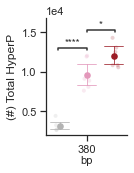

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=1.437e-05 stat=-7.820e+00
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=3.638e-02 stat=-2.415e+00


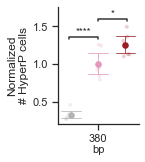

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=7.927e-08 stat=-1.377e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=3.311e-04 stat=-5.334e+00


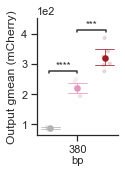

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=1.056e-09 stat=-2.150e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=4.533e-02 stat=2.286e+00


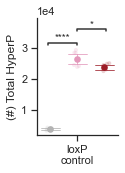

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=1.056e-09 stat=-2.150e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=4.533e-02 stat=2.286e+00


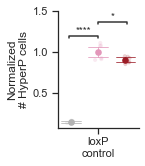

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=1.546e-13 stat=-5.242e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=3.096e-02 stat=2.509e+00


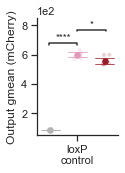

In [38]:
palette = { 'None':'#b3b3b3', 'DOX+eeBxb1':'#E397BA', 'DOX+Cre':'#9C1C26'}

reps = [r1, r2, r3]
order = ['380 bp', 'loxP control']
cond_order = ['None','DOX+eeBxb1','DOX+Cre']

for rep in reps:

    slice_rep = summary_df_CTFR_all[summary_df_CTFR_all['replicate']==rep]

    for rept in order:

        slice = slice_rep[(slice_rep['reporter']==rept)]

        pairs = [((rept, 'None'), (rept, 'DOX+eeBxb1')),
                ((rept, 'DOX+eeBxb1'), (rept, 'DOX+Cre'))]
        
        rep_order=[rept]

        for y in dot2plot:
            
            savetitle = (f'TET-DIAL 5 dpi {rept} rep {rep} {y}')
            plottitle = savetitle
            SK_dotplot('reporter', y, 'cond', slice, pairs=pairs, palette=palette, order=rep_order, save_fig=False,
            hue_order=cond_order, savetitle=savetitle,figsize=[1.5,2.5],xlabel='',xticklabels=False,legend=False,plottitle='')


### all reps

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=5.354e-09 stat=-7.736e+00
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=9.723e-03 stat=-2.740e+00


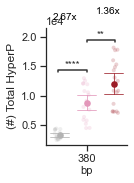

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=5.211e-16 stat=-1.437e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=1.367e-08 stat=-7.408e+00


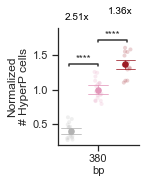

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_DOX+eeBxb1: t-test independent samples, P_val=4.266e-25 stat=-2.806e+01
380 bp_DOX+eeBxb1 v.s. 380 bp_DOX+Cre: t-test independent samples, P_val=5.604e-15 stat=-1.324e+01


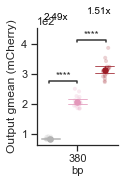

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=1.291e-19 stat=-1.891e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=1.627e-01 stat=1.427e+00


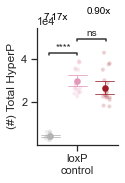

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=1.769e-33 stat=-5.020e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=9.171e-04 stat=3.632e+00


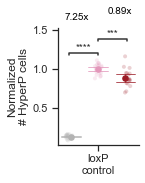

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_DOX+eeBxb1: t-test independent samples, P_val=7.843e-25 stat=-2.754e+01
loxP control_DOX+eeBxb1 v.s. loxP control_DOX+Cre: t-test independent samples, P_val=5.699e-02 stat=-1.970e+00


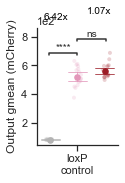

In [39]:
palette = { 'None':'#b3b3b3', 'DOX+eeBxb1':'#E397BA', 'DOX+Cre':'#9C1C26'}

order = ['380 bp', 'loxP control']
cond_order = ['None','DOX+eeBxb1','DOX+Cre']

for rept in order:

        slice = summary_df_CTFR_all[(summary_df_CTFR_all['reporter']==rept)]

        pairs = [((rept, 'None'), (rept, 'DOX+eeBxb1')),
                ((rept, 'DOX+eeBxb1'), (rept, 'DOX+Cre'))]
        
        rep_order=[rept]

        for y in dot2plot:
            
            savetitle = (f'TET-DIAL 5 dpi {rept} all reps {y}')
            plottitle = savetitle
            SK_dotplot('reporter', y, 'cond', slice, pairs=pairs, palette=palette, order=rep_order, save_fig=False, foldchange=True,
            hue_order=cond_order, savetitle=savetitle,figsize=[1.5,2.5],xlabel='',xticklabels=False,legend=False,plottitle='')


## 14 dpi plots

### iMN gate

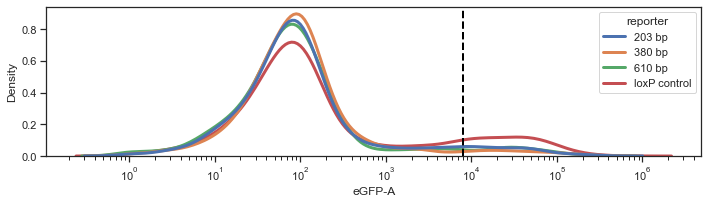

In [55]:
iMN_gate = 8 * 10**3 # Set gate

sns.set_theme(style="ticks",font_scale=1)

condition_list = ['203 bp','380 bp', '610 bp', 'loxP control']
slice = df_14dpi[df_14dpi['reporter'].isin(condition_list)]

# Plot gate
plt.figure(figsize=(10,3))
g = sns.kdeplot(data=slice.sample(10000),x='eGFP-A',hue='reporter',log_scale=True,common_norm=False,linewidth=3,hue_order=condition_list)
plt.axvline(x=iMN_gate,linestyle='--',color='black',linewidth=2)

#sns.move_legend(g, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
plt.tight_layout()
plt.show()

### Summary statistics iMN yield

In [56]:
groups = ['replicate','reporter','DOX','DOX-Day','modRNA','well'] # 'rep' must be first group!!!!

summary_df_14dpi = pd.concat([
    df_14dpi.groupby(groups)['mCherry-A'].apply(scipy.stats.gmean).rename('Output gmean (mCherry)'),
    df_14dpi.groupby(groups)['eGFP-A'].apply(lambda x: np.sum(x > iMN_gate)/5000 * 100).rename('(%) iMN yield\nper MEF plated')
], axis=1)
summary_df_14dpi = summary_df_14dpi.reset_index()
#save summary dataframe
summary_df_14dpi.to_excel('Fig6_14dpiiMNyield_reprogramming_TETDIAL_and_supps.xlsx',index=False)

dot2plot_14dpi = ['Output gmean (mCherry)', '(%) iMN yield\nper MEF plated']

In [57]:
summary_df_14dpi

,replicate,reporter,DOX,DOX-Day,modRNA,well,Output gmean (mCherry),(%) iMN yield\nper MEF plated
0,MEF1,203 bp,DOX,14 dpi,None,A1,3543.600131,27.88
1,MEF1,203 bp,DOX,14 dpi,None,A2,2987.014936,21.90
2,MEF1,203 bp,DOX,14 dpi,None,A3,3498.442673,17.42
3,MEF1,203 bp,DOX,14 dpi,None,A4,3267.563490,13.70
4,MEF1,203 bp,DOX,14 dpi,None,B1,2421.657874,13.94
...,...,...,...,...,...,...,...,...
859,MEF3,loxP control,NO DOX,None,None,G2,289.117775,1.20
860,MEF3,loxP control,NO DOX,None,None,G3,335.102154,2.68
861,MEF3,loxP control,NO DOX,None,None,H1,349.236530,2.00
862,MEF3,loxP control,NO DOX,None,None,H2,373.289182,2.78


In [58]:
summary_df_14dpi['DOX-Day'].unique()

array(['14 dpi', '5 dpi', '7 dpi', 'None'], dtype=object)

In [59]:
def set_cond(row):
    if row['DOX-Day'] == 'None' and row['modRNA'] == 'None':
        return 'None'
    elif row['DOX-Day'] == '5 dpi' and row['modRNA'] == 'eeBxb1':
        return '5 dpi'
    elif row['DOX-Day'] == '5 dpi' and row['modRNA'] == 'Puro-Cre':
        return '5 dpi + Cre'
    elif row['DOX-Day'] == '7 dpi' and row['modRNA'] == 'eeBxb1':
        return '7 dpi'
    elif row['DOX-Day'] == '7 dpi' and row['modRNA'] == 'Puro-Cre':
        return '7 dpi + Cre'
    elif row['DOX-Day'] == '14 dpi' and row['modRNA'] == 'eeBxb1':
        return '14 dpi'
    elif row['DOX-Day'] == '14 dpi' and row['modRNA'] == 'Puro-Cre':
        return '14 dpi + Cre'
    else:
        return None

# Apply the function to create the 'cond' column
summary_df_14dpi['cond'] = summary_df_14dpi.apply(set_cond, axis=1)

In [60]:
subset_380bp = summary_df_14dpi[summary_df_14dpi['reporter']=='380 bp']
subset_380bp.loc[subset_380bp["(%) iMN yield\nper MEF plated"].idxmax()]

replicate                               MEF1
reporter                              380 bp
DOX                                      DOX
DOX-Day                               14 dpi
modRNA                                eeBxb1
well                                      C7
Output gmean (mCherry)           1697.629095
(%) iMN yield\nper MEF plated          77.06
cond                                  14 dpi
Name: 90, dtype: object

In [61]:
summary_df_14dpi = summary_df_14dpi[summary_df_14dpi["(%) iMN yield\nper MEF plated"] != 77.06]

### 14 dpi mCherry MFI Rep 2025.04.27

In [62]:
summary_df_14dpi.cond.unique()

array([None, '14 dpi + Cre', '14 dpi', '5 dpi + Cre', '5 dpi',
       '7 dpi + Cre', '7 dpi', 'None'], dtype=object)

In [63]:
summary_df_14dpi

,replicate,reporter,DOX,DOX-Day,modRNA,well,Output gmean (mCherry),(%) iMN yield\nper MEF plated,cond
0,MEF1,203 bp,DOX,14 dpi,None,A1,3543.600131,27.88,None
1,MEF1,203 bp,DOX,14 dpi,None,A2,2987.014936,21.90,None
2,MEF1,203 bp,DOX,14 dpi,None,A3,3498.442673,17.42,None
3,MEF1,203 bp,DOX,14 dpi,None,A4,3267.563490,13.70,None
4,MEF1,203 bp,DOX,14 dpi,None,B1,2421.657874,13.94,None
...,...,...,...,...,...,...,...,...,...
859,MEF3,loxP control,NO DOX,None,None,G2,289.117775,1.20,None
860,MEF3,loxP control,NO DOX,None,None,G3,335.102154,2.68,None
861,MEF3,loxP control,NO DOX,None,None,H1,349.236530,2.00,None
862,MEF3,loxP control,NO DOX,None,None,H2,373.289182,2.78,None


In [64]:
summary_df_14dpi[summary_df_14dpi['cond']==None]

,replicate,reporter,DOX,DOX-Day,modRNA,well,Output gmean (mCherry),(%) iMN yield\nper MEF plated,cond


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=1.397e-03 stat=-3.401e+00
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=1.120e-07 stat=-6.300e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=5.520e-01 stat=-5.999e-01


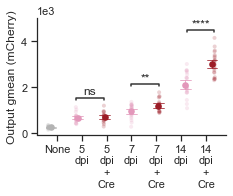

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=9.725e-03 stat=-2.698e+00
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=1.044e-01 stat=-1.657e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=4.000e-01 stat=-8.507e-01


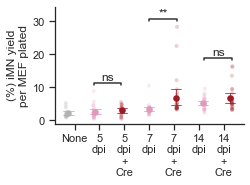

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=1.130e-01 stat=1.616e+00
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=7.284e-01 stat=-3.493e-01
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=3.761e-01 stat=8.950e-01


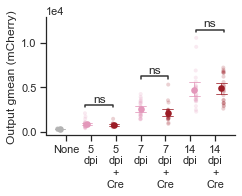

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=3.479e-01 stat=-9.484e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=8.927e-01 stat=-1.357e-01
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=9.802e-01 stat=2.503e-02


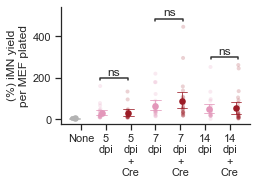

In [65]:
pairs = [

    (('5 dpi', '5 dpi'),('5 dpi + Cre', '5 dpi + Cre')),
    (('7 dpi', '7 dpi'),('7 dpi + Cre', '7 dpi + Cre')),
    (('14 dpi', '14 dpi'),('14 dpi + Cre', '14 dpi + Cre'))

]

palette = { 'None':'#b3b3b3',
           '5 dpi':'#E397BA', '5 dpi + Cre':'#9C1C26',
           '7 dpi':'#E397BA', '7 dpi + Cre':'#9C1C26',
           '14 dpi':'#E397BA', '14 dpi + Cre':'#9C1C26',}

order = ['380 bp', 'loxP control']
cond_order = ['None','5 dpi','5 dpi + Cre',
              '7 dpi','7 dpi + Cre',
              '14 dpi','14 dpi + Cre']

for rept in order:

    slice = summary_df_14dpi[summary_df_14dpi['reporter']==rept]

    rep_order=[rept]

    for y in dot2plot_14dpi:
        
        savetitle = (f'TET-DIAL 14 dpi {rept} all reps {y}')
        plottitle = savetitle
        
        if y == '(%) iMN yield\nper MEF plated':
            scientific = False
        else:
            scientific = True

        SK_dotplot('cond', y, 'cond', slice,
                pairs=pairs, 
                palette=palette, scientific=scientific, hue_order=cond_order,
                    order=cond_order, save_fig=False, pointplot_settings='fig6',
                    savetitle=savetitle,figsize=[3.5,2.5],
                    xlabel='',xticklabels=False,legend=False,plottitle='')



In [66]:
reporters = ['380 bp', 'loxP control']
columns = ['Output gmean (mCherry)', '(%) iMN yield\nper MEF plated']

# Store the results
fold_changes_by_reporter = {}

for reporter in reporters:
    subset = summary_df_14dpi[summary_df_14dpi['reporter'] == reporter]
    means = subset.groupby('cond')[columns].mean()

    fold_changes = {}

    for col in columns:
        comparisons = []

        # For 380 bp iMN yield, include extra comparisons
        if col == '(%) iMN yield\nper MEF plated' and reporter == '380 bp':
            pairs_to_check = [
                ('5 dpi', '5 dpi + Cre'),
                ('7 dpi', '7 dpi + Cre'),
                ('14 dpi', '14 dpi + Cre'),
                ('14 dpi + Cre', '7 dpi + Cre'),
                ('14 dpi', '7 dpi'),
                ('14 dpi', '7 dpi + Cre')
            ]
        else:
            pairs_to_check = [
                ('5 dpi', '5 dpi + Cre'),
                ('7 dpi', '7 dpi + Cre'),
                ('14 dpi', '14 dpi + Cre')
            ]

        for cond_base, cond_cre in pairs_to_check:
            if cond_base in means.index and cond_cre in means.index:
                base_val = means.loc[cond_base, col]
                cre_val = means.loc[cond_cre, col]
                if pd.notna(base_val) and base_val != 0:
                    fc = cre_val / base_val
                else:
                    fc = float('inf')
                comparisons.append((f'{cond_cre} / {cond_base}', fc))
        
        fold_changes[col] = pd.Series(dict(comparisons))

    fold_changes_by_reporter[reporter] = pd.DataFrame(fold_changes)

# View results
print("380 bp:\n", fold_changes_by_reporter['380 bp'])
print("\nloxP control:\n", fold_changes_by_reporter['loxP control'])

380 bp:
                             Output gmean (mCherry)  \
14 dpi + Cre / 14 dpi                     1.426226   
5 dpi + Cre / 5 dpi                       1.056206   
7 dpi + Cre / 14 dpi                           NaN   
7 dpi + Cre / 14 dpi + Cre                     NaN   
7 dpi + Cre / 7 dpi                       1.264172   
7 dpi / 14 dpi                                 NaN   

                            (%) iMN yield\nper MEF plated  
14 dpi + Cre / 14 dpi                            1.279912  
5 dpi + Cre / 5 dpi                              1.177562  
7 dpi + Cre / 14 dpi                             1.313687  
7 dpi + Cre / 14 dpi + Cre                       1.026388  
7 dpi + Cre / 7 dpi                              2.070906  
7 dpi / 14 dpi                                   0.634354  

loxP control:
                        Output gmean (mCherry)  (%) iMN yield\nper MEF plated
5 dpi + Cre / 5 dpi                  0.894360                       0.991204
7 dpi + Cre / 7 dpi   

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi + Cre_7 dpi + Cre v.s. 14 dpi_14 dpi: t-test independent samples, P_val=2.312e-01 stat=1.214e+00
7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=9.725e-03 stat=-2.698e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=4.000e-01 stat=-8.507e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=1.044e-01 stat=-1.657e+00
7 dpi_7 dpi v.s. 14 dpi_14 dpi: t-test independent samples, P_val=6.950e-04 stat=-3.643e+00
7 dpi + Cre_7 dpi + Cre v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=9.061e-01 stat=1.186e-01


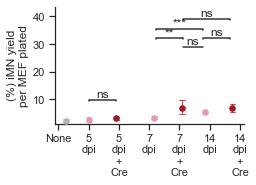

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi + Cre_7 dpi + Cre v.s. 14 dpi_14 dpi: t-test independent samples, P_val=2.312e-01 stat=1.214e+00
7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=9.725e-03 stat=-2.698e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=4.000e-01 stat=-8.507e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=1.044e-01 stat=-1.657e+00
7 dpi_7 dpi v.s. 14 dpi_14 dpi: t-test independent samples, P_val=6.950e-04 stat=-3.643e+00
7 dpi + Cre_7 dpi + Cre v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=9.061e-01 stat=1.186e-01


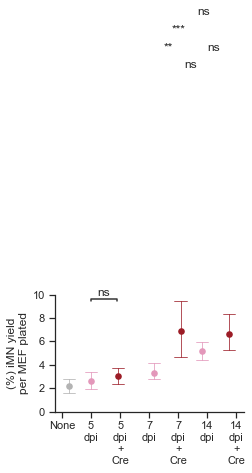

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi + Cre_7 dpi + Cre v.s. 14 dpi_14 dpi: t-test independent samples, P_val=1.032e-01 stat=1.663e+00
7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=3.479e-01 stat=-9.484e-01
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=9.802e-01 stat=2.503e-02
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=8.927e-01 stat=-1.357e-01
7 dpi_7 dpi v.s. 14 dpi_14 dpi: t-test independent samples, P_val=3.111e-01 stat=1.024e+00
7 dpi + Cre_7 dpi + Cre v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=1.603e-01 stat=1.427e+00


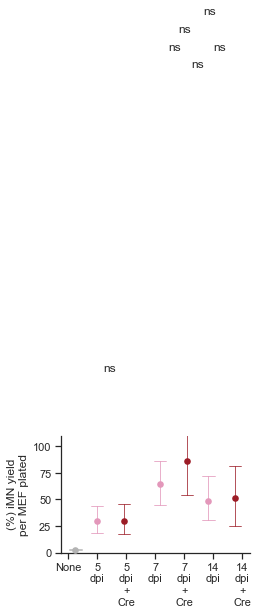

<AxesSubplot:ylabel='(%) iMN yield\nper MEF plated'>

In [67]:
pairs = [

    (('5 dpi', '5 dpi'),('5 dpi + Cre', '5 dpi + Cre')),
    (('7 dpi', '7 dpi'),('7 dpi + Cre', '7 dpi + Cre')),
    (('14 dpi', '14 dpi'),('14 dpi + Cre', '14 dpi + Cre')),
    (('14 dpi + Cre', '14 dpi + Cre'),('7 dpi + Cre', '7 dpi + Cre')),
    (('14 dpi', '14 dpi'),('7 dpi', '7 dpi')),
    (('14 dpi', '14 dpi'),('7 dpi + Cre', '7 dpi + Cre')),

]

palette = { 'None':'#b3b3b3',
           '5 dpi':'#E397BA', '5 dpi + Cre':'#9C1C26',
           '7 dpi':'#E397BA', '7 dpi + Cre':'#9C1C26',
           '14 dpi':'#E397BA', '14 dpi + Cre':'#9C1C26',}

order = ['None', '5 dpi', '5 dpi + Cre', '7 dpi', '7 dpi + Cre', '14 dpi', '14 dpi + Cre']
hue_order = ['None','eeBxb1','Puro-Cre']

# slice = summary_df_14dpi[(summary_df_14dpi['reporter']=='380 bp')]
# savetitle = (f'TET-DIAL 14 dpi mCherry MFI all reps no wells')
# plottitle = savetitle

# SK_dotplot('cond', 'mCherry MFI', 'cond', slice,
#             pairs=pairs, 
#             palette=palette, plot_reps=False,
#             order=palette, save_fig=True,
#             #hue_order=hue_order,
#             plottitle=plottitle,
#             savetitle=savetitle,figsize=[2,2.5],xlabel=None)

slice = summary_df_14dpi[summary_df_14dpi['reporter']=='380 bp']

savetitle = (f'TET-DIAL 14 dpi 380 bp iMN yield all reps for sig')
plottitle = savetitle

SK_dotplot('cond', y, 'cond', slice,
            pairs=pairs, scientific=False,
            palette=palette, plot_reps=False,
            order=palette, save_fig=False,
            savetitle=savetitle,figsize=[3.5,2.5],
            xlabel='',xticklabels=False,legend=False,plottitle='')

savetitle = (f'TET-DIAL 14 dpi 380 bp iMN yield all reps no wells')
plottitle = savetitle

SK_dotplot('cond', y, 'cond', slice,
            pairs=pairs, scientific=False,
            palette=palette, ylim=[0,10], plot_reps=False,
            order=palette, save_fig=False,
            savetitle=savetitle,figsize=[3.5,2.5], pointplot_settings='fig6',
            xlabel='',xticklabels=False,legend=False,plottitle='')

slice = summary_df_14dpi[summary_df_14dpi['reporter']=='loxP control']

savetitle = (f'TET-DIAL 14 dpi loxP control iMN yield all reps no wells')
plottitle = savetitle

SK_dotplot('cond', y, 'cond', slice,
            pairs=pairs, scientific=False,
            palette=palette, ylim=[0,110], plot_reps=False,
            order=palette, save_fig=False,
            savetitle=savetitle,figsize=[3.5,2.5], pointplot_settings='fig6',
            xlabel='',xticklabels=False,legend=False,plottitle='')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=5.354e-04 stat=-4.463e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=9.935e-01 stat=-8.310e-03
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=6.541e-05 stat=-5.765e+00


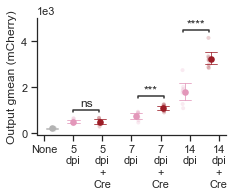

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=2.709e-01 stat=-1.146e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=6.766e-01 stat=-4.274e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=3.124e-01 stat=-1.051e+00


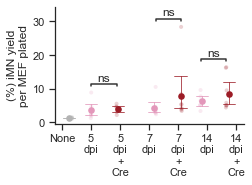

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=5.125e-01 stat=-6.720e-01
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=7.889e-01 stat=2.738e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=6.969e-01 stat=-3.976e-01


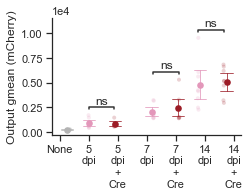

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=6.314e-01 stat=-4.904e-01
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=9.352e-01 stat=8.301e-02
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=6.850e-01 stat=4.143e-01


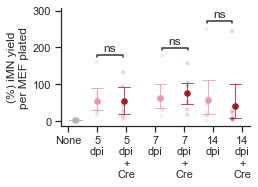

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=1.075e-01 stat=-1.720e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=2.184e-01 stat=-1.299e+00
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=6.484e-03 stat=-3.195e+00


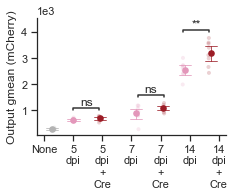

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=1.135e-02 stat=-2.913e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=2.908e-01 stat=-1.105e+00
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=6.096e-01 stat=-5.223e-01


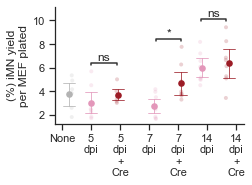

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=5.173e-03 stat=3.309e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=3.614e-01 stat=-9.488e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=6.509e-01 stat=4.624e-01


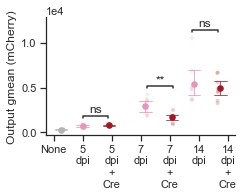

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=6.940e-01 stat=4.017e-01
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=8.731e-01 stat=1.631e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=7.068e-01 stat=3.840e-01


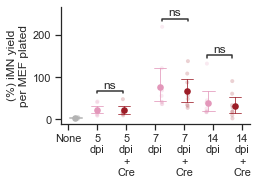

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=6.508e-02 stat=-2.002e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=5.810e-01 stat=-5.673e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=4.235e-04 stat=-4.586e+00


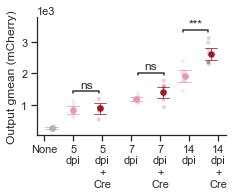

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=4.795e-02 stat=-2.167e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=6.543e-01 stat=-4.592e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=2.131e-01 stat=-1.304e+00


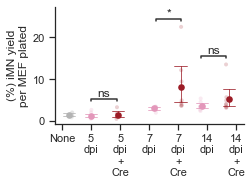

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=2.950e-01 stat=1.088e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=1.802e-01 stat=1.423e+00
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=4.542e-01 stat=-7.699e-01


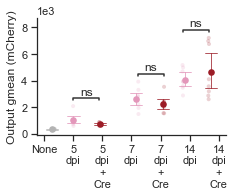

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7 dpi_7 dpi v.s. 7 dpi + Cre_7 dpi + Cre: t-test independent samples, P_val=3.053e-01 stat=-1.064e+00
5 dpi_5 dpi v.s. 5 dpi + Cre_5 dpi + Cre: t-test independent samples, P_val=6.167e-01 stat=-5.138e-01
14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=3.559e-01 stat=-9.548e-01


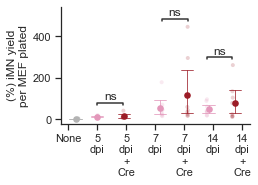

In [68]:
pairs = [

    (('5 dpi', '5 dpi'),('5 dpi + Cre', '5 dpi + Cre')),
    (('7 dpi', '7 dpi'),('7 dpi + Cre', '7 dpi + Cre')),
    (('14 dpi', '14 dpi'),('14 dpi + Cre', '14 dpi + Cre'))  
]

palette = { 'None':'#b3b3b3',
           '5 dpi':'#E397BA', '5 dpi + Cre':'#9C1C26',
           '7 dpi':'#E397BA', '7 dpi + Cre':'#9C1C26',
           '14 dpi':'#E397BA', '14 dpi + Cre':'#9C1C26',}
reps = [r1, r2, r3]
order = ['380 bp', 'loxP control']

for rep in reps:

    slice_rep = summary_df_14dpi[summary_df_14dpi['replicate']==rep]

    for rept in order:
        slice = slice_rep[(slice_rep['reporter']==rept)]

        rep_order=[rept]

        # For each y in dot2plot_14dpi, plot the data

        for y in dot2plot_14dpi:
        
            savetitle = (f'TET-DIAL 14 dpi {rept} rep {rep} {y}')
            plottitle = savetitle

            if y == '(%) iMN yield\nper MEF plated':
                scientific = False
            else:
                scientific = True

            SK_dotplot('cond', y, 'cond', slice,
                pairs=pairs, 
                palette=palette, scientific=scientific,
                    order=palette, save_fig=False, pointplot_settings='fig6',
                    savetitle=savetitle,figsize=[3.5,2.5],
                    xlabel='',xticklabels=False,legend=False,plottitle='')


In [69]:
df_14dpi_Hb9 = df_14dpi[df_14dpi['eGFP-A']> iMN_gate]

summary_Hb9 = df_14dpi_Hb9.groupby(groups)['mCherry-A'].apply(scipy.stats.gmean).rename('Output gmean (mCherry)').reset_index()

summary_Hb9

,replicate,reporter,DOX,DOX-Day,modRNA,well,Output gmean (mCherry)
0,MEF1,203 bp,DOX,14 dpi,None,A1,6395.961451
1,MEF1,203 bp,DOX,14 dpi,None,A2,6610.008402
2,MEF1,203 bp,DOX,14 dpi,None,A3,6449.347881
3,MEF1,203 bp,DOX,14 dpi,None,A4,5991.145861
4,MEF1,203 bp,DOX,14 dpi,None,B1,6177.548841
...,...,...,...,...,...,...,...
859,MEF3,loxP control,NO DOX,None,None,G2,287.592727
860,MEF3,loxP control,NO DOX,None,None,G3,254.338292
861,MEF3,loxP control,NO DOX,None,None,H1,268.182376
862,MEF3,loxP control,NO DOX,None,None,H2,294.524991


In [70]:
summary_Hb9['cond'] = summary_Hb9.apply(set_cond, axis=1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=3.609e-04 stat=-3.852e+00


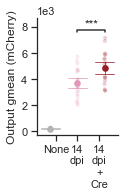

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

14 dpi_14 dpi v.s. 14 dpi + Cre_14 dpi + Cre: t-test independent samples, P_val=2.993e-01 stat=-1.050e+00


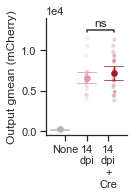

In [71]:
pairs = [
    (('14 dpi','14 dpi'), ('14 dpi + Cre','14 dpi + Cre'))
]

palette = { 'None':'#b3b3b3',
           '14 dpi':'#E397BA', '14 dpi + Cre':'#9C1C26',}

order = ['380 bp', 'loxP control']
cond_order = ['None',
              '14 dpi','14 dpi + Cre']

for rept in order:

    slice = summary_Hb9[summary_Hb9['reporter']==rept]

    rep_order=[rept]
        
    savetitle = (f'TET-DIAL 14 dpi {rept} Hb9+ mCherry MFI')
    plottitle = savetitle

    SK_dotplot('cond', 'Output gmean (mCherry)', 'cond', slice,
            pairs=pairs, 
            palette=palette, hue_order=cond_order,
                order=cond_order, save_fig=False, pointplot_settings='fig6_2',
                savetitle=savetitle,figsize=[1.5,2.5],
                xlabel='',xticklabels=False,legend=False,plottitle='')

In [72]:
summary_Hb9_replot = summary_Hb9[(summary_Hb9['cond'].isin(cond_order)) & (summary_Hb9['reporter'].isin(order))]

In [73]:
summary_Hb9_replot

,replicate,reporter,DOX,DOX-Day,modRNA,well,Output gmean (mCherry),cond
80,MEF1,380 bp,DOX,14 dpi,Puro-Cre,C10,4935.844056,14 dpi + Cre
81,MEF1,380 bp,DOX,14 dpi,Puro-Cre,C11,5592.017162,14 dpi + Cre
82,MEF1,380 bp,DOX,14 dpi,Puro-Cre,C12,5515.132071,14 dpi + Cre
83,MEF1,380 bp,DOX,14 dpi,Puro-Cre,C9,5875.772977,14 dpi + Cre
84,MEF1,380 bp,DOX,14 dpi,Puro-Cre,D10,3128.449674,14 dpi + Cre
...,...,...,...,...,...,...,...,...
859,MEF3,loxP control,NO DOX,None,None,G2,287.592727,None
860,MEF3,loxP control,NO DOX,None,None,G3,254.338292,None
861,MEF3,loxP control,NO DOX,None,None,H1,268.182376,None
862,MEF3,loxP control,NO DOX,None,None,H2,294.524991,None


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

380 bp_None v.s. 380 bp_14 dpi: t-test independent samples, P_val=4.603e-17 stat=-1.405e+01
380 bp_14 dpi v.s. 380 bp_14 dpi + Cre: t-test independent samples, P_val=3.609e-04 stat=-3.852e+00


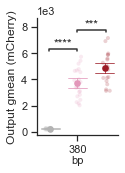

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

loxP control_None v.s. loxP control_14 dpi: t-test independent samples, P_val=5.554e-18 stat=-1.496e+01
loxP control_14 dpi v.s. loxP control_14 dpi + Cre: t-test independent samples, P_val=2.993e-01 stat=-1.050e+00


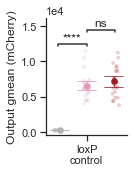

In [74]:
order = ['380 bp', 'loxP control']
cond_order = ['None',
              '14 dpi','14 dpi + Cre']

for rept in order:

    slice = summary_Hb9_replot[summary_Hb9_replot['reporter']==rept]

    rep_order=[rept]

    pairs = [
        ((rept,'None'), (rept,'14 dpi')),
    ((rept,'14 dpi'), (rept,'14 dpi + Cre'))
]
        
    savetitle = (f'TET-DIAL 14 dpi {rept} Hb9+ mCherry MFI replot')
    plottitle = savetitle

    SK_dotplot('reporter', 'Output gmean (mCherry)', 'cond', slice,
            pairs=pairs, 
            palette=palette, hue_order=cond_order, pointplot_settings='old',
                order=rep_order, save_fig=False,
                savetitle=savetitle,figsize=[1.5,2.5],
                xlabel='',xticklabels=False,legend=False,plottitle='')

In [75]:
reporters = ['380 bp', 'loxP control']
columns = ['Output gmean (mCherry)']

# Store the results
fold_changes_by_reporter = {}

for reporter in reporters:
    subset = summary_Hb9_replot[summary_Hb9_replot['reporter'] == reporter]
    means = subset.groupby('cond')[columns].mean()

    fold_changes = {}

    for col in columns:
        comparisons = []

        pairs_to_check = [
            ('None', '14 dpi'),
            ('14 dpi', '14 dpi + Cre')
        ]

        for cond_base, cond_cre in pairs_to_check:
            if cond_base in means.index and cond_cre in means.index:
                base_val = means.loc[cond_base, col]
                cre_val = means.loc[cond_cre, col]
                if pd.notna(base_val) and base_val != 0:
                    fc = cre_val / base_val
                else:
                    fc = float('inf')
                comparisons.append((f'{cond_cre} / {cond_base}', fc))
        
        fold_changes[col] = pd.Series(dict(comparisons))

    fold_changes_by_reporter[reporter] = pd.DataFrame(fold_changes)

# View results
print("380 bp:\n", fold_changes_by_reporter['380 bp'])
print("\nloxP control:\n", fold_changes_by_reporter['loxP control'])

380 bp:
                        Output gmean (mCherry)
14 dpi / None                       16.446113
14 dpi + Cre / 14 dpi                1.319892

loxP control:
                        Output gmean (mCherry)
14 dpi / None                       25.350928
14 dpi + Cre / 14 dpi                1.088303
